<a href="https://colab.research.google.com/github/JuanCReyes1/DataScienceinPython/blob/master/GeneralizedDeltaLearning_GradientDescent_ThreeNeuronFeedForwardNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks
## The Delta Learning Rule and Backpropagation

## Juan C. Reyes - Dalhousie University 
### Nov.28, 2019.
### The following exercise is based on Stephen Lynch's Book: Dynamical Systems with Applications using Python.
### Chapter 20: The Delta Learning Rule and Backpropagation

A neural network can be thought of as a parallel information-processing system. They are used in a wide variety of fields for implementing associative memories for pattern and speech production and recognition. When we model certain neural networks, we often try to attribute certain functions in our brains in common with their network architecture. 

In the following notebook we will implement a neural network composed of *neurons* and *synaptic weights* which together will perform a series of complex computations through what is called a *learning process*. We will be performing such complex computations on the famous Boston housing dataset which is publicly available through the sklearn.datasets library. 
The goal of this learning process is to devise a neural network which will accurately *predict* the dataset's target characteristic: The median *value* of owner-occupied homes in Boston (column 14).

Since we are viewing this document through Google Colab you may execute my code as you read along by holding shift+enter on each code 'chunk'. Just make sure to 'view' this file through the 'playground' option in the top left hand corner. This mode will let you edit my code and save your own version!


### Importing Data and Data Cleaning
Before we create a neural network to help us with any prediction task we must make sure that the data it will be operating on is as clean as possible. For this it is necessary to complete some *data cleaning* prior to running our model and fitting parameters.

We import the sklearn.datasets package which contains the load_boston function.

In [0]:
from sklearn.datasets import load_boston


Load the Boston housing dataset with the load_boston function.
We display the type of data generated from this operation.

In [0]:
boston = load_boston()
print(type(boston))

<class 'sklearn.utils.Bunch'>


A 'Bunch' is a subclass of the 'dict' datatype. It supports all methods a dictionary object does.
Lets find out the keys for each Bunch object.

In [0]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


With the given keys we may explore the data downloaded:
The housing data is stored under 'boston.data':

In [0]:
print(boston.data) #display the housing data

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


We can display the dimensions of the housing data:

In [0]:
print(boston.data.shape) 

(506, 13)


The Boston housing dataset consists of 506 rows (observations) and 13 columns (attributes).
The column names (attributes) are stored in boston.feature_names :

In [0]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Our dataset has a strange choice of column names, lets look into our dataset's documentation to learn more about the data. It is worthwhile to note that boston.data does not include our target column values. Hopefully a description of the dataset will reveal more information on the structure of the data.

In [0]:
#description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The documentation of the Boston housing dataset revealed a lot of information regarding our dataset!
We confirm that the size of our dataset is 506 measurements with 13 (numerical and categorical) *attributes* of our data. Our data's *target* column is the median value of owner-occupied homes.

 Our aim for now is to use just three of these attributes (columns) and their corresponding data (506 rows) to *train* a *learning model* which will help predict the target column (median value of owner-occupied homes) of our dataset. 

We will make some small adjustments to this dataset with Pandas. Mainly adding our target value to the dataset, and displaying a quick summary of statistics relevant to the dataset.

Recall that pandas is an open source data analysis library with many useful functions for data cleaning and manipulation readily available for us.

We will now inport Pandas into our notebook and convert boston.data which is a NumPy ndarray into a Pandas dataframe:

In [0]:
type(boston.data)

numpy.ndarray

In [0]:
import pandas as pd
bos = pd.DataFrame(boston.data) #convert boston.data into a Pandas dataframe
type(bos)

pandas.core.frame.DataFrame

We use the df.head() function to display the first 5 features of our dataset.

In [0]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Our dataset's columns have lost their name label and have been indexed from 0-12. This can be solved quickly with Pandas.

Recall that our column names were imported as *feature names* from sklearn.datasets . Lets see what they are again: 

In [0]:
#column names
print(boston.feature_names)
print(type(boston.feature_names))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
<class 'numpy.ndarray'>


Simply assign these feature names to the columns of our Pandas dataframe with the df.columns function

In [0]:
bos.columns = boston.feature_names #Assigns the feature names (numpy.ndarray) to the column names of our Pandas dataframe.
print(bos.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


Reviewing our dataframe again should display our dataframe with the column names added to it.

In [0]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The authors of the dataset have chosen to not include our target column into the dataset. As a result, there is no column named 'PRICE' in our Pandas dataframe.
The target column is available as a separate attribute in the Boston bunch called 'target'. 

In [0]:
#Check
print("target shape: " +""+ str(boston.target.shape))
print(boston.target) #our target column !

target shape: (506,)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 

As we can see our target column exactly matches the number of rows (506) in our Pandas dataset. We will now add the target column to our Pandas dataframe.

In [0]:
bos['PRICE'] = boston.target # Add the boston.target rows to a new column in our dataframe 'PRICE' 
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Our data is officially clean! 
Lets perform a quick summary of relevant statistics for our data with the Pandas df.describe() function:

In [0]:
bos.describe() #provides summary statistics

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


While it is handy to work with our dataset in Pandas to clean data, add column names, and obtain statistics, we will now return to working with our data as a numpy array in order to perform various numerical calculations using the NumPy package in Python.

Import the NumPy library:

In [0]:
import numpy as np

We can use the Pandas.DataFrame.to_numpy() function to convert a Pandas Dataframe to a NumPy ndarray.

In [0]:
bosnp = pd.DataFrame.to_numpy(bos) #convert from Pandas dataframe to NumPy ndarray.
print(type(bosnp)) #display the type of data generated
bosnp #show data

<class 'numpy.ndarray'>


array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

Lets confirm that the size of our dataset remained unchanged.

In [0]:
rows, columns = bosnp.shape #assign the dimensions of our dataset to variables
print(rows)
print(columns)

506
14


# Implementing a Generalized Delta Learning Rule with Gradient Descent

<figure>
<center>
<img src='https://drive.google.com/uc?id=1wBP3Tq8qmGLPWUKD2ESj9ulhXGAiwEFY' alt = "a neuron" width="600" height="400" />
<figcaption>A model of a single neuron with a bias $b$, inputs $x_{n}$, activation function $\phi$, and output $y_{k}$</figcaption>
</center>
</figure>

Now that we have a clean dataset we can turn our focus to creating a neural network to help us with making a prediction process of our dataset. I present a Python program which applies the generalized delta learning rule to the Boston housing data for three attributes: average number of rooms, accessibility to radial highways, and percentage of lower status of the population to help us estimate the target value of owner-occupied homes in the Boston housing dataset. 

Consider a single neuron as presented in Figure 20.1 Given a linear activation function then our output is given by:

$ y_{k} = \sum_{j} w_{kj}x_{j} + b_{k} $

With an *error function* defined by the mean squared error:
$E = \frac{1}{2N} \sum_{x} (E_{k}^{x})^{2} = \frac{1}{2N} \sum_{x} (t_{k} - y_{k})^2$

Here the x index ranges over all input vectors, $N$ is the number of neurons in our model, $E^{x}$ is the error on vector $x$ and $t_{k}$ is the target output when vector x is presented. 

The aim is to minimize the error function $E$ with respect to the weights $w_{kj}$. This is an *unconstrained optimization* problem. Parameters $w_{kj}$ are sought to minimize the error. The *method of steepest descent* is applied to the error function to adjust the weights in our neural network.

The method of gradient descent we will be using:
The gradients $g = x_{k}(1- y_{k}^{2})(y_{k} - t_{k})$ to update each weight:
$w_{kj}(n+1) = w_{kj}(n) - \eta g_{kj} $.

We begin our implementation:





In [0]:
columns = 4 #Define the total number of inputs into our model (1 bias + 3 column attributes)
X = bosnp[:, [5,8,12]] # cols(attributes): average num. rooms, access.to radial highways, percentage lower status of pop.
t = bosnp[:, 13] #target column: median value of owner-occupied homes.


Initialize our weight arrays and iteration count variable:

In [0]:
ws1, ws2, ws3, ws4 = [], [], [], []
k = 0 

We scale our data to a mean of zero:


In [0]:
#Calculate the average
xmean = X.mean(axis=0)
#Calculate the standard deviation
xstd = X.std(axis=0)

#Create an array of ones, will help with algebra
ones = np.array([np.ones(rows)])

#Scale to zero mean
X = (X- xmean*ones.T) / (xstd* ones.T)

Incorporate a bias (+1) into our model:

In [0]:
#Incorporate our array of ones into our dataset as a bias input
X = np.c_[np.ones(rows),X] 

In [0]:
print(X)
print("X shape: "+ "" + str(X.shape))

[[ 1.          0.41367189 -0.98284286 -1.0755623 ]
 [ 1.          0.19427445 -0.8678825  -0.49243937]
 [ 1.          1.28271368 -0.8678825  -1.2087274 ]
 ...
 [ 1.          0.98496002 -0.98284286 -0.98304761]
 [ 1.          0.72567214 -0.98284286 -0.86530163]
 [ 1.         -0.36276709 -0.98284286 -0.66905833]]
X shape: (506, 4)


Additionally, scale the target variable to zero mean:

In [0]:
#Calculate the average of the target variable
tmean = (max(t) + min(t)) / 2
#Calculate the standard deviation of the target variable.
tstd = (max(t) - min(t)) / 2

#Scale to zero mean
t = (t - tmean) / tstd


Our data is labelled and scaled! We are now ready to implement the learning process. We begin by assigning small random weights to our weight vector:

In [0]:
w = 0.1 * np.random.random(columns)

Since the value of the weights have a direct impact on how each of the features are being taken into account and since we chosen the weights at random, **we are extremely likely to obtain a large error in our initial learning exercise**. We will see how the *gradient descent* method will yield an optimized set of parameters $w_{kj}$ such that they minimize the error from our predicted value $y_{k}$ and the correct target value $t_{k}$.

We also fix our learning rate parameter $\eta$ and introduce an epoch value, which corresponds to the number of times we wish to subject our dataset to the *learning process* to improve its accuracy.
 

In [0]:
num_epochs = 10 #number of iterations
eta = 0.001

Calculate our first output vector with the random weights:
We are using $\phi (v) = tanh(v)$ as our activation function.

In [0]:
y1 = np.tanh(X.dot(w))

Determine our error given the respective target variable t and our newly calculated output using our random weights:

In [0]:
e1 = t - y1 #first error calculation
mse = np.var(e1) #variance of our error

Update our iteration count (we have performed one calculation).

In [0]:
k = 1

Now we iterate this same procedure over the total number of epochs we have chosen. At the end of all epochs we store all our weight values into an array where we can investigate to which values our parameters converged to.

In [0]:
for m in range(num_epochs): #number of calculations 
  for n in range(rows):
    ## Calculate new output given the new weights and calculate the error.

    yk = np.tanh(X[n,:].dot(w)) #new output vector given new weight vector
    err = yk - t[n] #error recalculation step

    ## Now use gradient descent to calculate new weights w for the next loop.
    
    g = X[n,:].T * ((1 - yk**2) * err) #first recalculate the new gradient vector g
    w = w - eta * g #delta rule for a linear activation function
    k += 1 #update our iteration parameter count

    ##Append new weight values into our list of weight values 
    
    ws1.append([k, np.array(w[0]).tolist()])
    ws2.append([k, np.array(w[1]).tolist()])
    ws3.append([k, np.array(w[2]).tolist()])
    ws4.append([k, np.array(w[3]).tolist()])

## Store our complete list of iteration counts-weight values as a NumPy array.
ws1 = np.array(ws1)
ws2 = np.array(ws2)
ws3 = np.array(ws3)
ws4 = np.array(ws4)     

Our weight vectors $\sum_{i=1} ^ {n=4} w_{i}$ are now stored as NumPy arrays. For each weight, we may now check the parameter value to which our gradient descent model converged to, given our number of epochs and learning parameter $\eta$.

In [0]:
k #the total number of iterations our program performed

5061

In [0]:
ws1f = ws1[k-2][1]
ws2f = ws2[k-2][1]
ws3f = ws3[k-2][1]
ws4f = ws4[k-2][1]
print(ws1f)
print(ws2f)
print(ws3f)
print(ws4f)

-0.2644246610778815
0.21528347662655192
-0.04513856184549004
-0.21603947335808393


From reading the last of our parameter values from our NumPy array's of weights we can see our weight values:


1.   $w_{1} = w_{1f} = -0.27$ 
2.   $w_{2} = w_{2f} = 0.21$ 
3.   $w_{3} = w_{3f} = -0.04$ 
4.   $w_{4} = w_{4f} = -0.24$ 





It is much easier to visualize our weight values converging if we interpret this visually through a graph.
We now import matplotlib to help us with creating mathematical graphs.

In [0]:
import matplotlib.pyplot as plt

We create our plot with the following code:

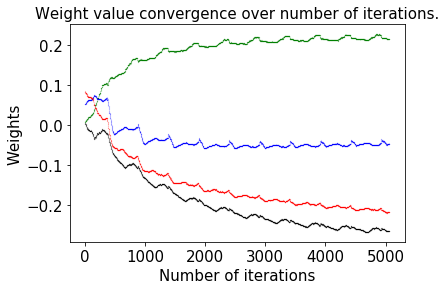

In [0]:
## Plot our iteration number k vs weight value

plt.plot(ws1[:,0], ws1[:,1], 'k.', markersize=0.1)
plt.plot(ws2[:,0], ws2[:,1], 'g.', markersize=0.1)
plt.plot(ws3[:,0], ws3[:,1], 'b.', markersize=0.1)
plt.plot(ws4[:,0], ws4[:,1], 'r.', markersize=0.1)

## Label our axes
plt.xlabel('Number of iterations', fontsize=15)
plt.ylabel('Weights', fontsize = 15)
plt.title("Weight value convergence over number of iterations.", fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

We have seen how a non-linear activation function has resulted in a convergence of our weight values as our number of iterations increased. This is an example of a simple three-neuron +bias feed forward network; there were no hidden layers and there was only one output. In the following exercise we will use a generalized delta rule with batch backpropagation of errors on the full dataset. We will use the same activation function but include a hidden layer in the neural network. In general we can work with any number of hidden layers although in general one suffices. It has been shown that one hidden layer is sufficient to approximate any continuous function. 